# Lab Vision Systems: Session 2

## Today:

### 1: Solution Assignment 1

### 2: Popular CNN Architectures and Transfer Learning

### 3: Tensorboard

### 4: Transfer Learning

# 0: Some Comments

## Some Comments about the Assignments

 - Do not just show plots or numbers. All results need to be interpreted:
    - Why is a model is better than others
    - What is going on in this plot
    - Which classes does the model confuse. Does that make sense?
    - ...
  

<div class="row">
    <img src="./imgs/matrix.png" width="20%"/>
    <img src="./imgs/matrix_nice.png" width="40%" style="padding-left:5%"/>
</div>

### Train vs. Eval Mode

 - Why do we need to change modes?

<img src="imgs/train_eval.png" width="40%">

In [4]:
import torch.nn as nn
bn = nn.BatchNorm2d(32)
print(bn)

dp = nn.Dropout(0.2)
print(dp)

BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Dropout(p=0.2, inplace=False)


### Effect of Learning Rate

<div>
   <img src="imgs/loss_2.png" width="80%">
</div>

### Using Existing Code

If you use code snippets from GitHub or StackOverflow, cite the original source in a comment or Docstring!

<img src="imgs/reference.png" width="70%">

### Encapsulation

Instead of writing all the code sequentially, encapsulate functionalities that will be reused:

In [5]:
import torch.nn as nn

class NetworkSequential(nn.Module):
    """ 
    Neural network: cascade layers.
        - Poor readibility 
        - Not a good coding practice
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(128, 256, 3),
            nn.ReLU()
        )
    def forward(self, x):
        return self.model(x)

In [6]:
import torch.nn as nn

class ConvBlock(nn.Module):
    """
    Encapuslation of a convolutional block (conv + activation + pooling)
    """
    def __init__(self, in_ch, out_ch, k_size, pool=False):
        super().__init__()
        layers = []
        layers.append(nn.Conv2d(in_ch, out_ch, k_size))
        layers.append(nn.ReLU())
        if(pool):
            layers.append(nn.MaxPool2d(kernel_size=2))
        self.module = nn.Sequential(*layers)
    def forward(self, x):
        return(self.module(x))


class NetworkEncaps(nn.Module):
    """ 
    Neural network: cascade of convolutional blocks
    Good readibility, and good coding practice
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            ConvBlock(3, 16, 3, pool=False),
            ConvBlock(16, 32, 3, pool=True),
            ConvBlock(32, 64, 3, pool=False),
            ConvBlock(64, 128, 3, pool=True),
            ConvBlock(128, 256, 3, pool=False)
        )
    def forward(self, x):
        return self.model(x)

In [7]:
network_seq = NetworkSequential()
network_encaps = NetworkEncaps()

In [8]:
network_seq

NetworkSequential(
  (model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
  )
)

In [9]:
network_encaps

NetworkEncaps(
  (model): Sequential(
    (0): ConvBlock(
      (module): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (1): ConvBlock(
      (module): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (2): ConvBlock(
      (module): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (3): ConvBlock(
      (module): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (4): ConvBlock(
      (module): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
  )
)

In [1]:
def count_model_params(model):
    """ Counting the number of learnable parameters in a nn.Module """
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return num_params

print(count_model_params(network_seq))
print(count_model_params(network_encaps))

NameError: name 'network_seq' is not defined

### Training Models Beforehand
You do not need to train the model in you final notebook for submission

Cleaner and safer to do as follows:
 - Train the model beforehand and save checkpoints, including the model and optimizer, as well as loss values and other data
 - Load the best checkpoint
 - Use the parameters and metadata stored in the checkpoint to make plots, run inference, ...

---

---

# 1: Solution Assignment 2

By Vladislav and Veronika

# 2: Popular CNN Architectures and Transfer Learning

# 3: Tensorboard

TensorBoard provides the visualization and tooling needed for machine learning experimentation:
 - https://www.tensorflow.org/tensorboard/
 - https://pytorch.org/docs/stable/tensorboard.html

In [2]:
import os
import shutil
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
from torchvision.utils import save_image

print(torch.cuda.is_available())

True


In [3]:
from torch.utils.tensorboard import SummaryWriter

In [13]:
TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "test")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)

In [17]:
shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS, flush_secs=1)

In [18]:
randoms = []
for i in range(int(1e4)):
    exp = np.exp(i/1000)
    random = np.random.randn()  # (N(0, 1))
    randoms.append(random)
    uniform = np.random.rand() * 2 + 3  # (U(3, 5))
    uniform2 = np.random.rand() * 2 - 5  # (U(3, 5))

    writer.add_scalar(f'Exp Number', exp, global_step=i)
    writer.add_scalars(f'Random_Stuff/All', {
                'Gaussian': random,
                'Uniform': uniform,
                'Uniform2': uniform2
            }, i)
    writer.add_scalars(f'Random_Stuff/Gaussian', {
                'Gaussian': random
            }, i)
    writer.add_scalars(f'Random_Stuff/Uniform', {
                'Uniform': uniform
            }, i)
    
    if(i % 1000 == 0):
        # adding random figures
        imgs = torch.randn(16,1,16,16)
        grid = torchvision.utils.make_grid(imgs, normalize=True)
        writer.add_image('images', grid, global_step=i)

# 4: Transfer Learning


In this tutorial, you will learn how to train your network using transfer learning. You can read more about the transfer learning at `cs231n notes http://cs231n.github.io/transfer-learning/

Quoting this notes,
```
In practice, very few people train an entire Convolutional Network
from scratch (with random initialization), because it is relatively
rare to have a dataset of sufficient size. Instead, it is common to
pretrain a ConvNet on a very large dataset (e.g. ImageNet, which
contains 1.2 million images with 1000 categories), and then use the
ConvNet either as an initialization or a fixed feature extractor for
the task of interest.
```

These major transfer learning scenarios look as follows:

 - **Finetuning the CNN**: Instead of random initializaion, we initialize the network with a pretrained network, like the one that is trained on the Imagenet dataset. Rest of the training looks as usual.
 
 - **CNN as fixed feature extractor**: Here, we will freeze the weights for all of the network except that of the final fully connected classifier. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.
 
 - **Combined Approach**: Training first the classifier only, and then doing some joined fine-tuning of both CNN feature extractor and classifier

In [19]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

In [20]:
torch.cuda.is_available()

True

## Data Loading

We will use torchvision and torch.utils.data packages for loading the data.

The problem we're going to solve today is to train a model to classify ants and bees. We have about 120 training images each for ants and bees. There are 75 validation images for each class. Usually, this is a very small dataset to generalize upon, if trained from scratch. Since we are using transfer learning, we should be able to generalize reasonably well.

This dataset is a very small subset of imagenet.

In [21]:
# !wget https://download.pytorch.org/tutorial/hymenoptera_data.zip #Download the data from
# !unzip hymenoptera_data.zip
# !mkdir data
# !mv hymenoptera_data data

In [19]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), data_transforms["train"])
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), data_transforms["val"])

N_train = len(train_dataset)
N_valid = len(valid_dataset)
print(f"Training set size: {N_train} images")
print(f"Valdiation set size: {N_valid} images")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)

Training set size: 244 images
Valdiation set size: 153 images


In [20]:
class_names = train_dataset.classes
print(class_names)

['ants', 'bees']


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Visualizing some Images

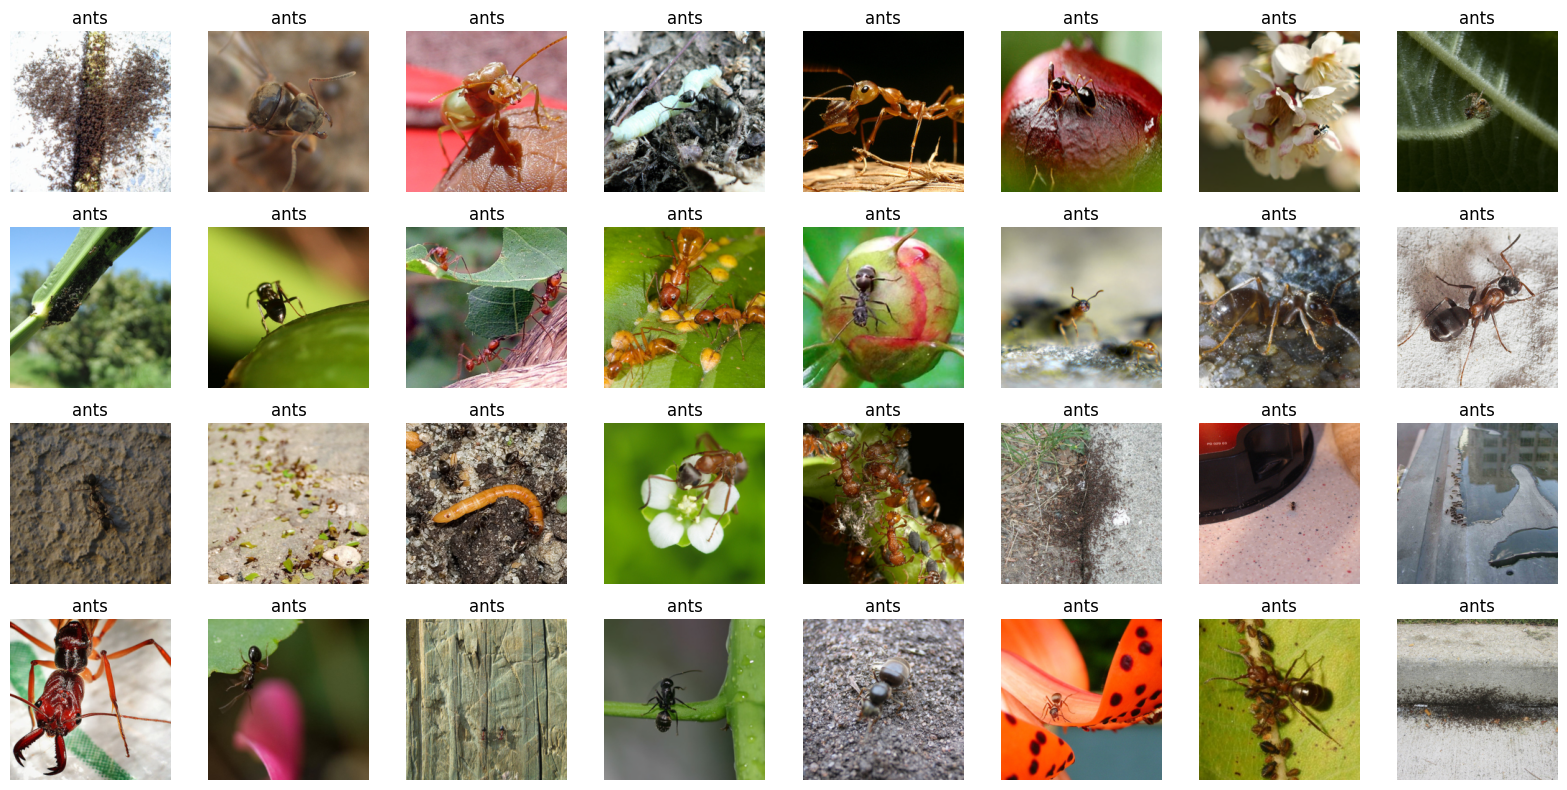

In [27]:
def show_grid(data, titles=None):
    """Imshow for Tensor."""
    data = data.numpy().transpose((0, 2, 3, 1))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    data = std * data + mean  # IMPORTANT! If you normalize imgs in the DataLoader, undo the norm. for visualization
    data = np.clip(data, 0, 1)
    
    plt.figure(figsize=(8*2, 4*2))
    for i in range(32):
        plt.subplot(4,8,i+1)
        plt.imshow(data[i])
        plt.axis("off")
        if titles is not None:
            plt.title(titles[i])
    plt.tight_layout()
    plt.show()
            
# Get a batch of training data and displaying it
# inputs, classes = next(iter(train_loader))
inputs, classes = next(iter(valid_loader))
titles = [class_names[x] for x in classes]

show_grid(inputs, titles=titles)

## Main Code

In [18]:
def train_epoch(model, train_loader, optimizer, criterion, epoch, device):
    """ Training a model for one epoch """
    
    loss_list = []
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
         
        # Forward pass to get output/logits
        outputs = model(images)
         
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
         
        # Getting gradients w.r.t. parameters
        loss.backward()
         
        # Updating parameters
        optimizer.step()
        
    mean_loss = np.mean(loss_list)
    return mean_loss, loss_list


@torch.no_grad()
def eval_model(model, eval_loader, criterion, device):
    """ Evaluating the model for either validation or test """
    correct = 0
    total = 0
    loss_list = []
    
    for images, labels in eval_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass only to get logits/output
        outputs = model(images)
                 
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
            
        # Get predictions from the maximum value
        preds = torch.argmax(outputs, dim=1)
        correct += len( torch.where(preds==labels)[0] )
        total += len(labels)
                 
    # Total correct predictions and loss
    accuracy = correct / total * 100
    loss = np.mean(loss_list)
    
    return accuracy, loss


def train_model(model, optimizer, scheduler, criterion, train_loader, valid_loader, num_epochs, tboard=None, start_epoch=0):
    """ Training a model for a given number of epochs"""
    
    train_loss = []
    val_loss =  []
    loss_iters = []
    valid_acc = []
    assert tboard is not None, f"Tensorboard must be provided!"
    
    for epoch in tqdm(range(num_epochs)):
           
        # validation epoch
        model.eval()  # important for dropout and batch norms
        accuracy, loss = eval_model(
                    model=model, eval_loader=valid_loader,
                    criterion=criterion, device=device
            )
        valid_acc.append(accuracy)
        val_loss.append(loss)
        tboard.add_scalar(f'Accuracy/Valid', accuracy, global_step=epoch+start_epoch)
        tboard.add_scalar(f'Loss/Valid', loss, global_step=epoch+start_epoch)
        
        # training epoch
        model.train()  # important for dropout and batch norms
        mean_loss, cur_loss_iters = train_epoch(
                model=model, train_loader=train_loader, optimizer=optimizer,
                criterion=criterion, epoch=epoch, device=device
            )
        scheduler.step()
        train_loss.append(mean_loss)
        tboard.add_scalar(f'Loss/Train', mean_loss, global_step=epoch+start_epoch)

        loss_iters = loss_iters + cur_loss_iters
        
        if(epoch % 5 == 0 or epoch==num_epochs-1):
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"    Train loss: {round(mean_loss, 5)}")
            print(f"    Valid loss: {round(loss, 5)}")
            print(f"    Accuracy: {accuracy}%")
            print("\n")
    
    print(f"Training completed")
    return train_loss, val_loss, loss_iters, valid_acc

In [10]:
def save_model(model, optimizer, epoch, stats):
    """ Saving model checkpoint """
    
    if(not os.path.exists("models")):
        os.makedirs("models")
    savepath = f"models/checkpoint_epoch_{epoch}.pth"

    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'stats': stats
    }, savepath)
    return


def load_model(model, optimizer, savepath):
    """ Loading pretrained checkpoint """
    
    checkpoint = torch.load(savepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint["epoch"]
    stats = checkpoint["stats"]
    
    return model, optimizer, epoch, stats


def smooth(f, K=5):
    """ Smoothing a function using a low-pass filter (mean) of size K """
    kernel = np.ones(K) / K
    f = np.concatenate([f[:int(K//2)], f, f[int(-K//2):]])  # to account for boundaries
    smooth_f = np.convolve(f, kernel, mode="same")
    smooth_f = smooth_f[K//2: -K//2]  # removing boundary-fixes
    return smooth_f

def set_random_seed(random_seed=None):
    """
    Using random seed for numpy and torch
    """
    if(random_seed is None):
        random_seed = 13
    os.environ['PYTHONHASHSEED'] = str(random_seed)
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    return

## Model

We get a pretrained ResNet-18 model. We keep the convolutional part, but drop the fully-connected classification head and make one of our own.

In [30]:
set_random_seed()

In [31]:
model = models.resnet18(pretrained=True)

In [35]:
model.layer1[0].conv1.weight.data.shape

torch.Size([64, 64, 3, 3])

In [32]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
model.fc = nn.Sequential(
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256, 2)
)

In [37]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Training Our Model

In [38]:
set_random_seed()

# downloading pretrained model
model = models.resnet18(pretrained=True)  # https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

# replacing classification head with a single linear layer that outputs 2 logits
num_logits = model.fc.in_features
# model.fc = nn.Linear(num_logits, 2)
model.fc = nn.Sequential(
    nn.Linear(num_logits, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)
)

model = model.to(device)

In [39]:
# classification loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Decay LR by a factor of 3 every 5 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1/3)

## 1. Fine-Tuning

The number of images is very small, so it trains very fast on a GPU

In [40]:
TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "CNNs", "CNN_tuned")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [41]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=model, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=valid_loader, num_epochs=15, tboard=writer
    )

  7%|▋         | 1/15 [00:01<00:27,  1.97s/it]

Epoch 1/15
    Train loss: 0.53483
    Valid loss: 0.74974
    Accuracy: 35.294117647058826%




 40%|████      | 6/15 [00:11<00:17,  1.94s/it]

Epoch 6/15
    Train loss: 0.10644
    Valid loss: 0.20049
    Accuracy: 94.11764705882352%




 73%|███████▎  | 11/15 [00:21<00:07,  1.93s/it]

Epoch 11/15
    Train loss: 0.08993
    Valid loss: 0.22522
    Accuracy: 94.11764705882352%




100%|██████████| 15/15 [00:28<00:00,  1.92s/it]

Epoch 15/15
    Train loss: 0.07732
    Valid loss: 0.20441
    Accuracy: 94.11764705882352%


Training completed


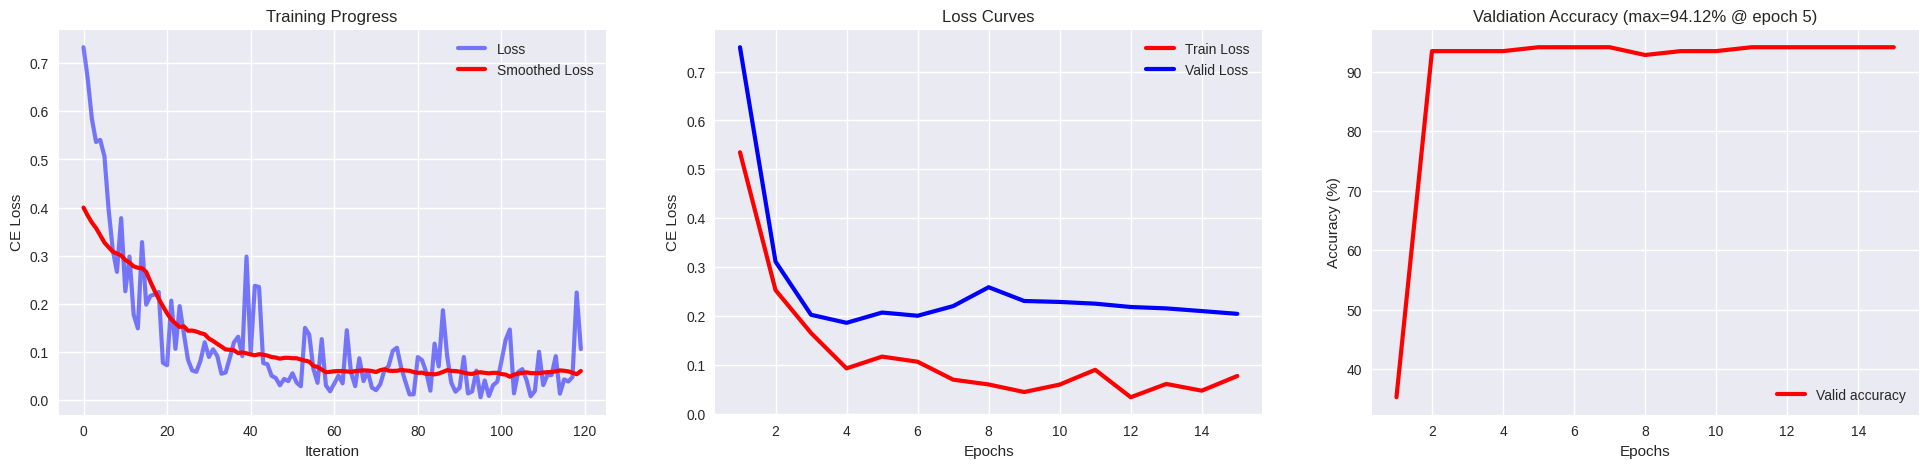

In [42]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,5)

smooth_loss = smooth(loss_iters, 31)
ax[0].plot(loss_iters, c="blue", label="Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3, alpha=1)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress")

epochs = np.arange(len(train_loss)) + 1
ax[1].plot(epochs, train_loss, c="red", label="Train Loss", linewidth=3)
ax[1].plot(epochs, val_loss, c="blue", label="Valid Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("CE Loss")
ax[1].set_title("Loss Curves")

epochs = np.arange(len(val_loss)) + 1
ax[2].plot(epochs, valid_acc, c="red", label="Valid accuracy", linewidth=3)
ax[2].legend(loc="best")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy (%)")
ax[2].set_title(f"Valdiation Accuracy (max={round(np.max(valid_acc),2)}% @ epoch {np.argmax(valid_acc)+1})")

plt.show()

## 2. ConvNet as fixed feature extractor

Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward().

You can read more about this in the documentation `here http://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward

In [43]:
set_random_seed()

In [44]:
fixedModel = torchvision.models.resnet18(pretrained=True)

# Freezing model parameters
for param in fixedModel.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_logits = fixedModel.fc.in_features
# fixedModel.fc = nn.Linear(num_logits, 2)
fixedModel.fc = nn.Sequential(
    nn.Linear(num_logits, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)
)
fixedModel = fixedModel.to(device)

In [45]:
# classification loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(fixedModel.parameters(), lr=1e-4)

# Decay LR by a factor of 0.3 every 5 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1/3)

In [46]:
TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "CNNs", "CNN_fixed")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [47]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=fixedModel, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=valid_loader, num_epochs=15, tboard=writer, start_epoch=0
    )

  7%|▋         | 1/15 [00:01<00:16,  1.15s/it]

Epoch 1/15
    Train loss: 0.66457
    Valid loss: 0.74974
    Accuracy: 35.294117647058826%




 40%|████      | 6/15 [00:06<00:09,  1.10s/it]

Epoch 6/15
    Train loss: 0.33519
    Valid loss: 0.33145
    Accuracy: 95.42483660130719%




 73%|███████▎  | 11/15 [00:12<00:04,  1.09s/it]

Epoch 11/15
    Train loss: 0.34034
    Valid loss: 0.27994
    Accuracy: 96.07843137254902%




100%|██████████| 15/15 [00:16<00:00,  1.11s/it]

Epoch 15/15
    Train loss: 0.29316
    Valid loss: 0.26529
    Accuracy: 94.77124183006535%


Training completed


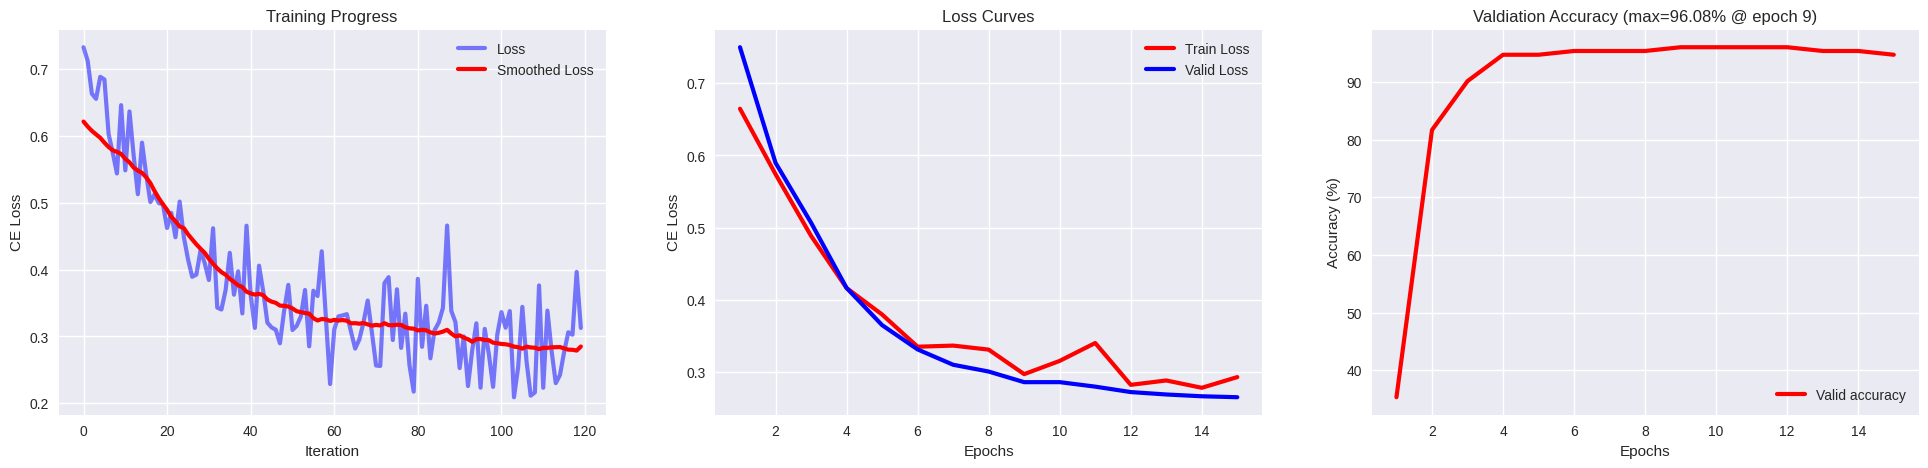

In [48]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,5)

smooth_loss = smooth(loss_iters, 31)
ax[0].plot(loss_iters, c="blue", label="Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3, alpha=1)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress")

epochs = np.arange(len(train_loss)) + 1
ax[1].plot(epochs, train_loss, c="red", label="Train Loss", linewidth=3)
ax[1].plot(epochs, val_loss, c="blue", label="Valid Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("CE Loss")
ax[1].set_title("Loss Curves")

epochs = np.arange(len(val_loss)) + 1
ax[2].plot(epochs, valid_acc, c="red", label="Valid accuracy", linewidth=3)
ax[2].legend(loc="best")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy (%)")
ax[2].set_title(f"Valdiation Accuracy (max={round(np.max(valid_acc),2)}% @ epoch {np.argmax(valid_acc)+1})")

plt.show()

## Combined Approach

 - First train only the classifier for 10 epochs
 - Unfreezing the backbone and fine-tuning for 10 more epochs with a lower learning rate

In [49]:
set_random_seed()

In [50]:
fixedModel = torchvision.models.resnet18(pretrained=True)

# Freezing model parameters
for param in fixedModel.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_logits = fixedModel.fc.in_features
# fixedModel.fc = nn.Linear(num_logits, 2)
fixedModel.fc = nn.Sequential(
    nn.Linear(num_logits, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)
)
fixedModel = fixedModel.to(device)

In [51]:
# classification loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(fixedModel.parameters(), lr=1e-4)

# Decay LR by a factor of 0.3 every 5 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1/3)

In [52]:
TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "CNNs", "CNN_combined")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [53]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=fixedModel, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=valid_loader, num_epochs=10, tboard=writer, start_epoch=0
    )

 10%|█         | 1/10 [00:01<00:10,  1.16s/it]

Epoch 1/10
    Train loss: 0.66457
    Valid loss: 0.74974
    Accuracy: 35.294117647058826%




 60%|██████    | 6/10 [00:06<00:04,  1.14s/it]

Epoch 6/10
    Train loss: 0.33519
    Valid loss: 0.33145
    Accuracy: 95.42483660130719%




100%|██████████| 10/10 [00:11<00:00,  1.13s/it]

Epoch 10/10
    Train loss: 0.31557
    Valid loss: 0.28615
    Accuracy: 96.07843137254902%


Training completed


In [54]:
# Unfreezing model parameters
for param in fixedModel.parameters():
    param.requires_grad = True

In [55]:
# Lowering learning rate
for g in optimizer.param_groups:
    g['lr'] *= 0.2

In [56]:
next_train_loss, next_val_loss, next_loss_iters, next_valid_acc = train_model(
        model=fixedModel, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=valid_loader, num_epochs=10,  tboard=writer, start_epoch=10
    )

 10%|█         | 1/10 [00:01<00:17,  1.93s/it]

Epoch 1/10
    Train loss: 0.33973
    Valid loss: 0.27994
    Accuracy: 96.07843137254902%




 60%|██████    | 6/10 [00:11<00:07,  1.95s/it]

Epoch 6/10
    Train loss: 0.26949
    Valid loss: 0.25288
    Accuracy: 95.42483660130719%




100%|██████████| 10/10 [00:19<00:00,  1.95s/it]

Epoch 10/10
    Train loss: 0.27554
    Valid loss: 0.24965
    Accuracy: 96.07843137254902%


Training completed


In [57]:
concat_train_loss = train_loss + next_train_loss
concat_val_loss = val_loss + next_val_loss
concat_loss_iters = loss_iters + next_loss_iters
concat_valid_acc = valid_acc + next_valid_acc

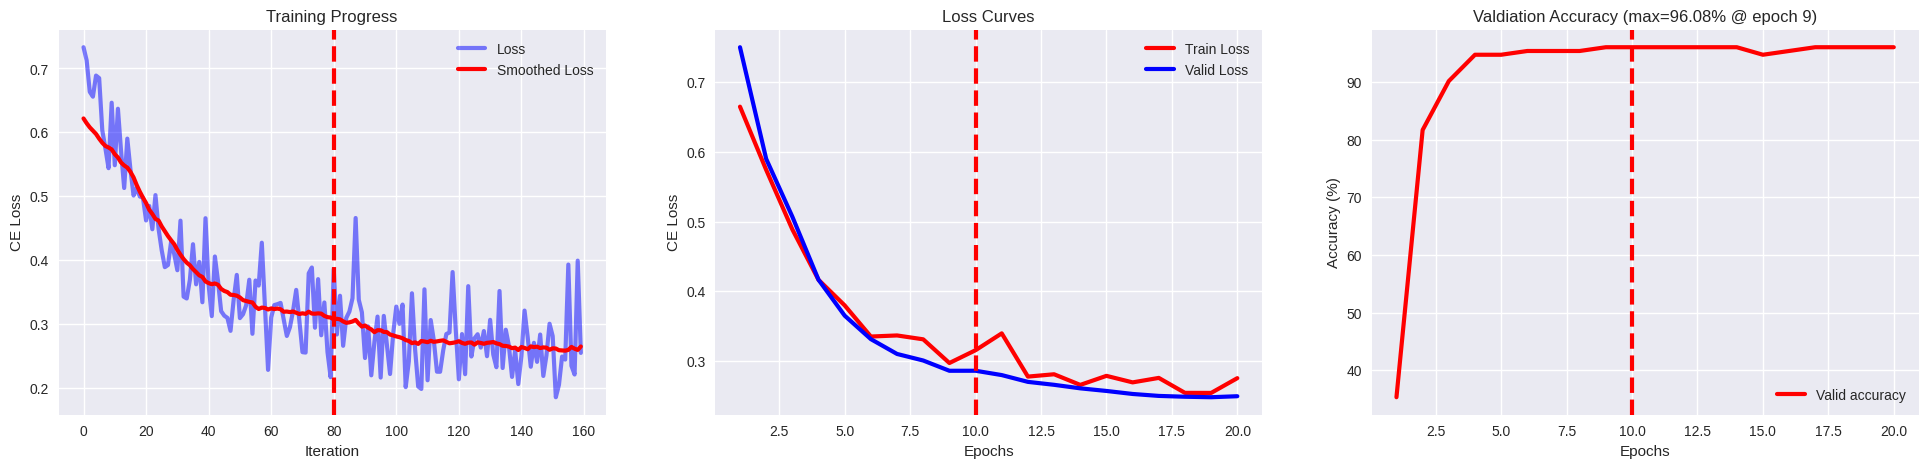

In [58]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,5)

smooth_loss = smooth(concat_loss_iters, 31)
ax[0].plot(concat_loss_iters, c="blue", label="Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3, alpha=1)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress")
ax[0].axvline(x=len(loss_iters), color="red", ls="--", linewidth=3)

epochs = np.arange(len(concat_train_loss)) + 1
ax[1].plot(epochs, concat_train_loss, c="red", label="Train Loss", linewidth=3)
ax[1].plot(epochs, concat_val_loss, c="blue", label="Valid Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("CE Loss")
ax[1].set_title("Loss Curves")
ax[1].axvline(x=10, color="red", ls="--", linewidth=3)

epochs = np.arange(len(concat_val_loss)) + 1
ax[2].plot(epochs, concat_valid_acc, c="red", label="Valid accuracy", linewidth=3)
ax[2].legend(loc="best")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy (%)")
ax[2].set_title(f"Valdiation Accuracy (max={round(np.max(concat_valid_acc),2)}% @ epoch {np.argmax(concat_valid_acc)+1})")
ax[2].axvline(x=10, color="red", ls="--", linewidth=3)

plt.show()

## 4. Fine-Tuning a Larger Model


In [4]:
import timm
from timm.models.vision_transformer import _create_vision_transformer, VisionTransformer
from functools import partial

model_kwargs = dict(
        patch_size=14,
        embed_dim=384,
        depth=12,
        num_heads=6,
        mlp_ratio=4,
        qkv_bias=True,
        norm_layer=partial(nn.LayerNorm, eps=1e-6),
        num_classes=0,
        img_size=224,  # default was 518
    )

dinov2 = timm.create_model(
            "vit_small_patch14_dinov2.lvd142m",
            pretrained=True,
            **model_kwargs
        )

In [7]:
count_model_params(dinov2)

21628800

In [8]:
resnet_18 = torchvision.models.resnet18(pretrained=True)
count_model_params(resnet_18)

11689512

In [13]:
device = torch.device("cuda")

In [14]:
set_random_seed()

# Freezing model parameters
for param in dinov2.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_logits = dinov2.norm.normalized_shape[0]

dinov2.head = nn.Sequential(
    nn.Linear(num_logits, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)
)
# dinov2.head = nn.Linear(num_logits, 2)

dinov2 = dinov2.to(device)

In [15]:
# classification loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(dinov2.parameters(), lr=1e-4)

# Decay LR by a factor of 0.3 every 5 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1/3)

In [16]:
TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "CNNs", "DINOv2")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [21]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=dinov2, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=valid_loader, num_epochs=15, tboard=writer, start_epoch=0
    )

  7%|██████████▏                                                                                                                                              | 1/15 [00:05<01:13,  5.27s/it]

Epoch 1/15
    Train loss: 0.60462
    Valid loss: 0.7399
    Accuracy: 57.51633986928104%




 40%|█████████████████████████████████████████████████████████████▏                                                                                           | 6/15 [00:28<00:42,  4.68s/it]

Epoch 6/15
    Train loss: 0.15779
    Valid loss: 0.19362
    Accuracy: 92.81045751633987%




 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 11/15 [00:51<00:18,  4.70s/it]

Epoch 11/15
    Train loss: 0.15354
    Valid loss: 0.17608
    Accuracy: 93.4640522875817%




100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:10<00:00,  4.72s/it]

Epoch 15/15
    Train loss: 0.12084
    Valid loss: 0.17287
    Accuracy: 94.11764705882352%


Training completed


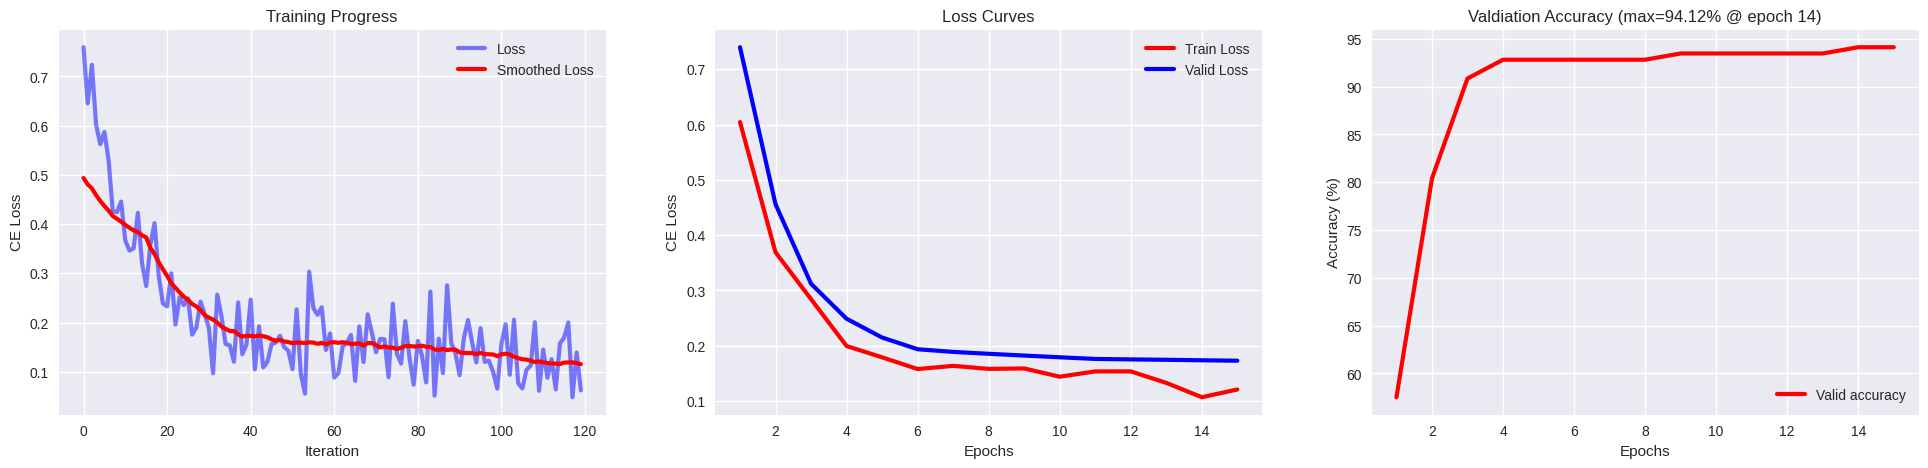

In [22]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,5)

smooth_loss = smooth(loss_iters, 31)
ax[0].plot(loss_iters, c="blue", label="Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3, alpha=1)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress")

epochs = np.arange(len(train_loss)) + 1
ax[1].plot(epochs, train_loss, c="red", label="Train Loss", linewidth=3)
ax[1].plot(epochs, val_loss, c="blue", label="Valid Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("CE Loss")
ax[1].set_title("Loss Curves")

epochs = np.arange(len(val_loss)) + 1
ax[2].plot(epochs, valid_acc, c="red", label="Valid accuracy", linewidth=3)
ax[2].legend(loc="best")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy (%)")
ax[2].set_title(f"Valdiation Accuracy (max={round(np.max(valid_acc),2)}% @ epoch {np.argmax(valid_acc)+1})")

plt.show()

# Assignment 2

## Humanoid-Robot vs. Person Classification

### Data Gathering

 - Gather a dataset for humanoid robot v.s. person classification. For the robot images, you can sample frames from the videos below or you can scrap Google or use some other videos. For the person images, scrap them from Google.
 - Get some diverse robot and person images, i.e., not always the same people and robots.
 
 - How to scrap images
     - https://intprogrammer.medium.com/how-to-scrape-google-for-images-to-train-your-machine-learning-classifiers-on-565076972ce
     - https://towardsdatascience.com/classifying-images-of-alcoholic-beverages-with-fast-ai-34c4560b5543
     - https://www.bardeen.ai/answers/how-to-scrape-images-from-the-web
     - https://www.geeksforgeeks.org/image-scraping-with-python/
     
     
- Robot videos
    - https://www.youtube.com/watch?v=gtJXGo8WEMY
    - https://www.youtube.com/watch?v=hKLC0Vz1GmM 
    - https://www.youtube.com/watch?v=6ldHWWHfeBc&t=5s
    - https://www.youtube.com/watch?v=WJKc56uUuF8
    - https://www.youtube.com/watch?v=RG205OwGdSg
    - https://www.youtube.com/watch?v=yVdB_0ry53o
    - https://www.youtube.com/watch?v=TWNvSHpMrSM
    - https://www.youtube.com/watch?v=UsmBD2_3FH8
    - https://www.youtube.com/watch?v=WGKo_6IkFBY
    - https://www.youtube.com/watch?v=G6xE7uWt6Fo&t=1s
    - https://www.youtube.com/watch?v=DrNcXgoFv20
    - https://www.youtube.com/watch?v=cpraXaw7dyc
    - https://www.youtube.com/watch?v=raYWbqbZbmc
    - https://www.youtube.com/watch?v=F_7IPm7f1vI
    - among others...


 - A total of 180 robot frames and 180 person frames should be enough.
     - Make sure your data is clean. Go through the images and replace those that are corrupted, ambiguous, ...
     - Do not use consecutive video frames!
     - Rename robot images as robot1.png, robot2.png,..., and the others as person1.png, ...
     - Use 150 frames from each class for training, and 30 for validation/testing
 


### Augmentations
For your experiments, use at least one augmentation from each of the following types:

 - Spatial Augmentations (rotation, mirroring, cropping, ...)
 - Use some other augmentations (color jitter, gaussian noise, ...).
 - Use one (or more) of the following advanced augmentations:
    - CutMix: https://arxiv.org/pdf/1905.04899.pdf
    - Mixup: https://arxiv.org/pdf/1710.09412.pdf

### Experiments:
Using your aforementioned augmentions:

 - Fine-tune ResNet, ConvNext and EfficientNet for your augmented dataset for human/robot classification and compare them.
 - Compare the following on a model of your choice: Fine-Tuned model, model as fixed feature extractor, and model with a Combined Approach
 - Compare your CNN based models with a DINOv2-based model used as a fixed feature extractor. Is DINOv2 better?
 - Log your losses and accuracies into Tensorboard (or some other logging tool)
 - Investigate your model. In what types of images does it fail? Why do you think so?
 - Evaluate your model on a few images from completely different robots from those seen during training? How does it perform?
 - Extra Point:
    - Fine-tune a Transformer-based model (e.g. SwinTransformer). Compare the performance (accuracy, confusion matrix, training time, loss landscape, ...) with the one from the convolutional models.

#### **Due Date**: Monday 5th May at 23:59

#### Notify me of the submission with a mail using the subject: CudaLab: Assignment2 + Group Name

#### Upload to GitHub the following: Jupyter Notebook after running, Jupyter export as html, dataset compressed as Zip, any other .py files or images used, tboard logs...

### **Next Session: Wednesday 7th May**

# References

 - https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
 - https://www.deeplearningbook.org/
 - http://cs231n.stanford.edu/
 - https://towardsdatascience.com/classifying-images-of-alcoholic-beverages-with-fast-ai-34c4560b5543

<div class=alert style="background-color:#F5F5F5; border-color:#C8C8C8">
    <b>Angel Villar-Corrales</b><br>
    <ul>
       <li> <b>Email</b>: villar@ais.uni-bonn.de
       <li> <b>Website</b>: angelvillarcorrales.com
    </ul>
</div>